In [8]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('M:/ML_scripts/mordred_mold2_rdkit_descr_tob_5889.csv') # importing data with 2418 descriptors on all compounds in the tobramycin dataset
structure = df['Structure']
classifier = df['Class']
df = df.drop(columns=['Structure','Unnamed: 0']) # data sorting
df.convert_dtypes()

c:\Users\sgjhewi2\.conda\envs\sklearn\Lib\site-packages\pandas\core\dtypes\cast.py:1056: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
c:\Users\sgjhewi2\.conda\envs\sklearn\Lib\site-packages\pandas\core\dtypes\cast.py:1080: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


,Class,nAcid,nBase,SpAbs_A,SpMax_A,SpDiam_A,SpAD_A,SpMAD_A,LogEE_A,VE1_A,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,0,0,40.789121,2.383203,4.764738,40.789121,1.315778,4.360269,4.559271,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,50.242353,2.388034,4.767226,50.242353,1.322167,4.568802,5.750502,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,55.005501,2.358957,4.717913,55.005501,1.279198,4.669394,5.666069,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,48.77849,2.33493,4.661533,48.77849,1.250731,4.560603,5.658308,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,47.267466,2.401041,4.789431,47.267466,1.312985,4.520143,4.904359,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,0,0,1,54.803442,2.485059,4.800445,54.803442,1.274499,4.68829,4.977148,...,0,0,0,0,0,0,0,0,0,0
5885,0,0,2,64.718604,2.51977,4.842932,64.718604,1.294372,4.840902,4.822458,...,0,0,0,0,0,0,0,1,0,0
5886,1,0,2,63.603126,2.457467,4.737626,63.603126,1.298023,4.818931,4.746874,...,0,0,0,0,0,0,0,1,0,0
5887,0,0,0,61.179102,2.466326,4.862438,61.179102,1.248553,4.80293,5.563753,...,0,0,0,0,0,0,0,0,0,0


In [200]:
from sklearn.feature_selection import VarianceThreshold

def variance(data, threshold=(0.1)):

    sel = VarianceThreshold(threshold)  # removing features of low variance (see below graph for the effect of changing the variance threshold)
    sel.fit(data)
    
    return data[data.columns[sel.get_support(indices=True)]]

var_df = variance(df)
var_df.insert(0, 'Structure', structure)
var_df.insert(1, 'Class', classifier)
#new_df.to_csv('../tobramycin_full_descriptors_var.csv')

In [187]:
features_removed=[]
thresh=[x for x in np.arange(0,1,0.005)]
for i in range(len(thresh)):
    df1 = variance(df, thresh[i])
    length = len(df.columns)-len(df1.columns) # just a loop to see the changes in number of features with differing intervals of variance threshold
    features_removed.append(length)
print(features_removed)

[399, 819, 957, 1031, 1085, 1118, 1146, 1162, 1176, 1196, 1218, 1230, 1242, 1250, 1257, 1271, 1284, 1292, 1293, 1294, 1301, 1302, 1304, 1305, 1308, 1308, 1325, 1331, 1337, 1339, 1342, 1351, 1360, 1362, 1364, 1369, 1372, 1374, 1384, 1388, 1391, 1394, 1398, 1401, 1409, 1415, 1417, 1419, 1419, 1423, 1424, 1428, 1429, 1434, 1439, 1443, 1444, 1445, 1446, 1446, 1446, 1447, 1449, 1451, 1453, 1454, 1454, 1456, 1456, 1458, 1458, 1458, 1460, 1462, 1463, 1464, 1464, 1466, 1466, 1467, 1467, 1468, 1468, 1469, 1470, 1474, 1474, 1475, 1477, 1478, 1481, 1481, 1481, 1481, 1481, 1482, 1485, 1486, 1488, 1488, 1488, 1488, 1488, 1490, 1490, 1490, 1490, 1491, 1492, 1493, 1496, 1498, 1499, 1499, 1501, 1503, 1503, 1503, 1503, 1506, 1506, 1506, 1507, 1507, 1510, 1513, 1514, 1515, 1516, 1517, 1517, 1517, 1520, 1520, 1520, 1520, 1520, 1520, 1520, 1521, 1521, 1521, 1521, 1522, 1522, 1522, 1524, 1524, 1524, 1524, 1525, 1525, 1525, 1525, 1528, 1528, 1529, 1529, 1530, 1530, 1531, 1531, 1531, 1532, 1533, 1535, 1535, 

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(df, column_name, output_filename):
    # Ensure the column exists in the DataFrame
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")
    
    # Plot the histogram
    plt.figure(figsize=(10, 6))
    df[column_name].plot(kind='hist', bins=30, edgecolor='black', alpha=0.7)
    
    # Title and labels
    plt.title(f"Histogram of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    
    # Save the plot as a PNG
    plt.savefig(output_filename, format='png')
    
    # Close the plot to free memory
    plt.close()
    
plot_histogram(df[2:], )


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd

def plot_hist_and_save(df, output_folder):
    # Create output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Loop through each column in the dataframe
    for column in df.columns:
        # Check if the column is numeric, since histograms require numeric data
        if pd.api.types.is_numeric_dtype(df[column]):
            # Create histogram
            plt.figure(figsize=(8, 6))
            df[column].hist(bins='auto', edgecolor='black')
            plt.title(column)
            plt.xlabel(column)
            plt.ylabel('Frequency')
            # Save the plot as a PNG file in the output folder
            plt.savefig(os.path.join(output_folder, f'{column}_histogram.png'))
            plt.close()  # Close the plot to avoid display during iteration

# Define the folder to save the plots
output_folder = r'M:\ML_scripts\histograms'

# Call the function
plot_hist_and_save(df, output_folder)

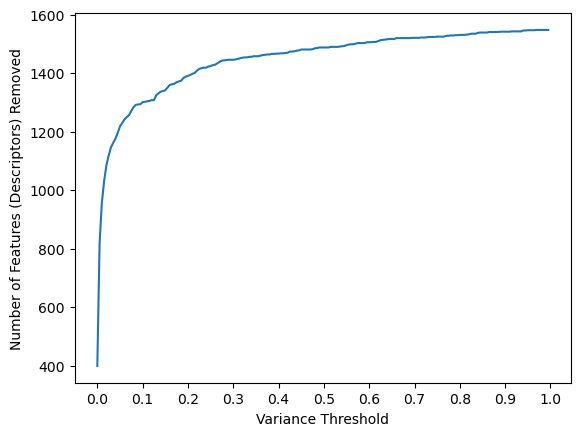

In [196]:
x = np.arange(0,1,0.005)
y = features_removed

fig = plt.plot(x,y)
plt.xticks(np.arange(0,1.1,0.1))
plt.xlabel('Variance Threshold')
plt.ylabel('Number of Features (Descriptors) Removed');

# Standard Scaling

In [229]:
from sklearn.preprocessing import StandardScaler

#var_df = var_df.drop(columns=['Structure'])

scaler = StandardScaler()
scaler.fit(var_df)
scaled_df = scaler.transform(var_df)
scaled_df = pd.DataFrame(scaled_df)

scaled_df.columns = var_df.columns # Standard scaler is sensitive to outliers and features may scale differently from each other in the presence of outliers

# Robust Scaling

In [234]:
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler(unit_variance=True) # if True, scale data so that normally distributed features have a variance of 1
rob_scaler.fit(var_df)
rob_scaled_df = rob_scaler.transform(var_df) # Robust scaling deals with outliers by using quartile ranges to scale rather than standard deviation 
rob_scaled_df = pd.DataFrame(rob_scaled_df)

rob_scaled_df.columns = var_df.columns

In [232]:
scaled_df

,Class,nBase,SpAbs_A,SpAD_A,VE1_A,VR1_A,VR2_A,VR3_A,nAromAtom,nAromBond,...,fr_amide,fr_aryl_methyl,fr_benzene,fr_bicyclic,fr_ether,fr_halogen,fr_methoxy,fr_para_hydroxylation,fr_piperdine,fr_pyridine
0,-0.242863,-0.482005,-2.101215,-2.101215,-0.864725,-0.409421,-0.363873,-1.368081,-1.181092,-1.188132,...,-1.275378,0.172718,-1.083340,0.774986,0.413787,-0.380927,0.834244,-0.454748,1.836432,-0.470473
1,-0.242863,1.814539,-0.853583,-0.853583,1.199885,-0.442256,-0.446531,-1.449589,0.304745,0.252698,...,-1.970749,-0.919802,0.453588,0.365944,2.025953,-0.380927,2.406359,1.791907,1.836432,-0.470473
2,-0.242863,-0.482005,-0.224946,-0.224946,1.053549,-0.333889,-0.337113,-0.526582,-0.933452,-0.947994,...,0.810735,-0.919802,-1.083340,1.593072,-0.392297,-0.380927,-0.737872,-0.454748,1.836432,2.039141
3,-0.242863,-0.482005,-1.046783,-1.046783,1.040098,-0.428165,-0.432043,-1.280469,-1.181092,-1.188132,...,0.115364,-0.919802,-1.083340,-0.247621,-0.392297,-0.380927,-0.737872,-0.454748,-0.506959,-0.470473
4,-0.242863,-0.482005,-1.246207,-1.246207,-0.266628,-0.380572,-0.354168,-0.993803,0.304745,0.252698,...,-1.275378,-0.919802,-1.083340,-0.656663,-0.392297,-0.380927,-0.737872,-0.454748,1.836432,2.039141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,-0.242863,1.814539,-0.251613,-0.251613,-0.140471,-0.013830,0.031900,0.481596,-0.438173,-0.227579,...,-0.580007,0.172718,-1.083340,-0.452142,-1.198380,-0.380927,-0.737872,4.038562,-0.506959,-0.470473
5885,-0.242863,4.111084,1.056984,1.056984,-0.408576,4.130067,4.055070,3.020297,-0.438173,-0.227579,...,-0.580007,0.172718,-1.083340,-0.452142,-0.392297,-0.380927,0.834244,-0.454748,1.836432,-0.470473
5886,4.117556,4.111084,0.909764,0.909764,-0.539577,0.746186,0.725935,1.593915,-0.438173,-0.227579,...,-0.580007,0.172718,-1.083340,-0.452142,-1.198380,-0.380927,-0.737872,4.038562,1.836432,-0.470473
5887,-0.242863,-0.482005,0.589842,0.589842,0.876217,-0.333060,-0.366020,-0.379758,-2.419289,-2.388823,...,1.506106,-0.919802,-1.083340,-0.656663,1.219870,-0.380927,3.978475,-0.454748,-0.506959,-0.470473


In [235]:
rob_scaled_df

,Class,nBase,SpAbs_A,SpAD_A,VE1_A,VR1_A,VR2_A,VR3_A,nAromAtom,nAromBond,...,fr_amide,fr_aryl_methyl,fr_benzene,fr_bicyclic,fr_ether,fr_halogen,fr_methoxy,fr_para_hydroxylation,fr_piperdine,fr_pyridine
0,0.00000,0.000000,-1.990475,-1.990475,-0.853540,-0.533500,-0.380740,-1.242070,-1.348980,-1.348980,...,-1.348980,0.00000,-1.348980,1.686224,0.674490,0.0,1.348980,0.000000,1.34898,0.00000
1,0.00000,1.348980,-0.790948,-0.790948,1.241351,-0.661421,-0.709072,-1.328598,0.000000,0.000000,...,-2.023469,-1.34898,0.000000,1.011735,2.023469,0.0,2.697959,1.348980,1.34898,0.00000
2,0.00000,0.000000,-0.186549,-0.186549,1.092868,-0.239234,-0.274443,-0.348746,-1.124150,-1.124150,...,0.674490,-1.34898,-1.348980,3.035204,0.000000,0.0,0.000000,0.000000,1.34898,1.34898
3,0.00000,0.000000,-0.976698,-0.976698,1.079219,-0.606527,-0.651521,-1.149062,-1.348980,-1.348980,...,0.000000,-1.34898,-1.348980,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000
4,0.00000,0.000000,-1.168433,-1.168433,-0.246671,-0.421109,-0.342187,-0.844741,0.000000,0.000000,...,-1.348980,-1.34898,-1.348980,-0.674490,0.000000,0.0,0.000000,0.000000,1.34898,1.34898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,0.00000,1.348980,-0.212188,-0.212188,-0.118664,1.007683,1.191342,0.721522,-0.674490,-0.449660,...,-0.674490,0.00000,-1.348980,-0.337245,-0.674490,0.0,0.000000,2.697959,0.00000,0.00000
5885,0.00000,2.697959,1.045953,1.045953,-0.390701,17.151900,17.172083,3.416574,-0.674490,-0.449660,...,-0.674490,0.00000,-1.348980,-0.337245,0.000000,0.0,1.348980,0.000000,1.34898,0.00000
5886,1.34898,2.697959,0.904410,0.904410,-0.523623,3.968631,3.948170,1.902345,-0.674490,-0.449660,...,-0.674490,0.00000,-1.348980,-0.337245,-0.674490,0.0,0.000000,2.697959,1.34898,0.00000
5887,0.00000,0.000000,0.596824,0.596824,0.912935,-0.236005,-0.389267,-0.192880,-2.473129,-2.473129,...,1.348980,-1.34898,-1.348980,-0.674490,1.348980,0.0,4.046939,0.000000,0.00000,0.00000
